In [2]:
# !/usr/bin/env python

# buckled layer model on rectangular lattice
# illustrates usage of function k_path

# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pythtb.txt)

from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import pylab as plt
import spglib as spg
import seekpath as sp

lattice = np.array([
    [ 3.2871687359128612, 0.0000000000000000, 0.0000000000000000],
    [-1.6435843679564306, 2.8467716318265182, 0.0000000000000000],
    [ 0.0000000000000000, 0.0000000000000000, 5.3045771064003047]])

positions = np.array([
    [0.3333333333333357,  0.6666666666666643,  0.3787615522102606],
    [0.6666666666666643,  0.3333333333333357,  0.8787615522102604],
    [0.6666666666666643,  0.3333333333333357,  0.4996814330926362],
    [0.3333333333333357,  0.6666666666666643,  0.9996814330926364]])

numbers = [8, 8, 30, 30]

O0 = positions[0]
O1 = positions[1]
Zn0 = positions[2]
Zn1 = positions[3]



#    s    px   py   pz
orb=[O0,  O0,  O0,  O0,
     O1,  O1,  O1,  O1,
     Zn0, Zn0, Zn0, Zn0,
     Zn1, Zn1, Zn1, Zn1]


# only first two lattice vectors repeat, so k-space is 2D
my_model=tb_model(3,3,lattice,orb)

# set on-site energies

Esa = -19.046
Epa =   4.142
Eha = (Esa+3*Epa)/4

Esc =   1.666
Epc =  12.368
Ehc = (Esc+3*Epc)/4


Uss   = -6.043
Uxx   =  7.157
Uxy   = 10.578
Usapc =  4.703
Upasc =  8.634

print(0.25*(Usapc*3+Upasc))


Vdi = -1
Vin = 0.0


I = np.ones(16)
H = np.array([
#   Oxygen 0            Oxygen 1             Zinc 0               Zinc 1
    [Eha, 0.0, 0.0, 0.0,  0.0, 0.0, 0.0, 0.0,  Vin, 0.0, 0.0, 0.0,  Vdi, 0.0, 0.0, 0.0],
    [0.0, Eha, 0.0, 0.0,  0.0, 0.0, 0.0, 0.0,  0.0, Vdi, 0.0, 0.0,  0.0, Vin, 0.0, 0.0],
    [0.0, 0.0, Eha, 0.0,  0.0, 0.0, 0.0, 0.0,  0.0, 0.0, Vin, 0.0,  0.0, 0.0, Vin, 0.0],
    [0.0, 0.0, 0.0, Eha,  0.0, 0.0, 0.0, 0.0,  0.0, 0.0, 0.0, Vin,  0.0, 0.0, 0.0, Vin],
    
    [0.0, 0.0, 0.0, 0.0,  Eha, 0.0, 0.0, 0.0,  Vin, 0.0, 0.0, 0.0,  Vin, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0,  0.0, Eha, 0.0, 0.0,  0.0, Vin, 0.0, 0.0,  0.0, Vin, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0,  0.0, 0.0, Eha, 0.0,  0.0, 0.0, Vin, 0.0,  0.0, 0.0, Vin, 0.0],
    [0.0, 0.0, 0.0, 0.0,  0.0, 0.0, 0.0, Eha,  0.0, 0.0, 0.0, Vin,  0.0, 0.0, 0.0, Vin],
    
    [0.0, 0.0, 0.0, 0.0,  0.0, 0.0, 0.0, 0.0,  Ehc, 0.0, 0.0, 0.0,  0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0,  0.0, 0.0, 0.0, 0.0,  0.0, Ehc, 0.0, 0.0,  0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0,  0.0, 0.0, 0.0, 0.0,  0.0, 0.0, Ehc, 0.0,  0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0,  0.0, 0.0, 0.0, 0.0,  0.0, 0.0, 0.0, Ehc,  0.0, 0.0, 0.0, 0.0],
    
    [0.0, 0.0, 0.0, 0.0,  0.0, 0.0, 0.0, 0.0,  0.0, 0.0, 0.0, 0.0,  Ehc, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0,  0.0, 0.0, 0.0, 0.0,  0.0, 0.0, 0.0, 0.0,  0.0, Ehc, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0,  0.0, 0.0, 0.0, 0.0,  0.0, 0.0, 0.0, 0.0,  0.0, 0.0, Ehc, 0.0],
    [0.0, 0.0, 0.0, 0.0,  0.0, 0.0, 0.0, 0.0,  0.0, 0.0, 0.0, 0.0,  0.0, 0.0, 0.0, Ehc]])


my_model.set_onsite(np.dot(H,I))

""" FROM O0 """
#O0[0,0,0] to Zn1[0,0,-1])
End_cell = [0, 0, -1]
init, final = 0*4,3*4
my_model.set_hop(Vdi,   init+1, final+1,  End_cell) #dir -> dir

my_model.set_hop(Vin, init+1, final+0,  End_cell) #dir -> indir
my_model.set_hop(Vin, init+1, final+2,  End_cell) #dir -> indir
my_model.set_hop(Vin, init+1, final+3,  End_cell) #dir -> indir

my_model.set_hop(Vin, init+0, final+1,  End_cell) #indir -> dir
my_model.set_hop(Vin, init+2, final+1,  End_cell) #indir -> dir
my_model.set_hop(Vin, init+3, final+1,  End_cell) #indir -> dir

#O0[0,0,0] to Zn1[0,1,-1])
End_cell = [0, 1, -1]
init, final = 0*4,3*4
my_model.set_hop(Vdi,   init+2, final+2,  End_cell) #dir -> dir

my_model.set_hop(Vin, init+2, final+0,  End_cell) #dir -> indir
my_model.set_hop(Vin, init+2, final+1,  End_cell) #dir -> indir
my_model.set_hop(Vin, init+2, final+3,  End_cell) #dir -> indir

my_model.set_hop(Vin, init+0, final+2,  End_cell) #indir -> dir
my_model.set_hop(Vin, init+1, final+2,  End_cell) #indir -> dir
my_model.set_hop(Vin, init+3, final+2,  End_cell) #indir -> dir

#O0[0,0,0] to Zn1[-1,0,-1])
End_cell = [-1, 0, -1]
init, final = 0*4,3*4
my_model.set_hop(Vdi,   init+3, final+3,  End_cell) #dir -> dir

my_model.set_hop(Vin, init+3, final+0,  End_cell) #dir -> indir
my_model.set_hop(Vin, init+3, final+1,  End_cell) #dir -> indir
my_model.set_hop(Vin, init+3, final+2,  End_cell) #dir -> indir

my_model.set_hop(Vin, init+0, final+3,  End_cell) #indir -> dir
my_model.set_hop(Vin, init+1, final+3,  End_cell) #indir -> dir
my_model.set_hop(Vin, init+2, final+3,  End_cell) #indir -> dir

#O0[0,0,0] to Zn0[0,0,0])
End_cell = [0, 0, 0]
init, final = 0*4,2*4
my_model.set_hop(Vdi,   init+0, final+0,  End_cell) #dir -> dir

my_model.set_hop(Vin, init+0, final+1,  End_cell) #dir -> indir
my_model.set_hop(Vin, init+0, final+2,  End_cell) #dir -> indir
my_model.set_hop(Vin, init+0, final+3,  End_cell) #dir -> indir

my_model.set_hop(Vin, init+1, final+0,  End_cell) #indir -> dir
my_model.set_hop(Vin, init+2, final+0,  End_cell) #indir -> dir
my_model.set_hop(Vin, init+3, final+0,  End_cell) #indir -> dir


""" FROM O1 """
#O1[0,0,0] to Zn0[0,0,0])
End_cell = [0, 0, 0]
init, final = 1*4,2*4
my_model.set_hop(Vdi,   init+1, final+1,  End_cell) #dir -> dir

my_model.set_hop(Vin, init+1, final+0,  End_cell) #dir -> indir
my_model.set_hop(Vin, init+1, final+2,  End_cell) #dir -> indir
my_model.set_hop(Vin, init+1, final+3,  End_cell) #dir -> indir

my_model.set_hop(Vin, init+0, final+1,  End_cell) #indir -> dir
my_model.set_hop(Vin, init+2, final+1,  End_cell) #indir -> dir
my_model.set_hop(Vin, init+3, final+1,  End_cell) #indir -> dir

#O1[0,0,0] to Zn0[0,-1,0])
End_cell = [0, -1, 0]
init, final = 1*4,2*4
my_model.set_hop(Vdi,   init+2, final+2,  End_cell) #dir -> dir

my_model.set_hop(Vin, init+2, final+0,  End_cell) #dir -> indir
my_model.set_hop(Vin, init+2, final+1,  End_cell) #dir -> indir
my_model.set_hop(Vin, init+2, final+3,  End_cell) #dir -> indir

my_model.set_hop(Vin, init+0, final+2,  End_cell) #indir -> dir
my_model.set_hop(Vin, init+1, final+2,  End_cell) #indir -> dir
my_model.set_hop(Vin, init+3, final+2,  End_cell) #indir -> dir

#O0[0,0,0] to Zn0[1,0,0])
End_cell = [1, 0, 0]
init, final = 1*4,2*4
my_model.set_hop(Vdi,   init+3, final+3,  End_cell) #dir -> dir

my_model.set_hop(Vin, init+3, final+0,  End_cell) #dir -> indir
my_model.set_hop(Vin, init+3, final+1,  End_cell) #dir -> indir
my_model.set_hop(Vin, init+3, final+2,  End_cell) #dir -> indir

my_model.set_hop(Vin, init+0, final+3,  End_cell) #indir -> dir
my_model.set_hop(Vin, init+1, final+3,  End_cell) #indir -> dir
my_model.set_hop(Vin, init+2, final+3,  End_cell) #indir -> dir

#O0[0,0,0] to Zn1[0,0,0])
End_cell = [0, 0, 0]
init, final = 1*4,3*4
my_model.set_hop(Vdi,   init+0, final+0,  End_cell) #dir -> dir

my_model.set_hop(Vin, init+0, final+1,  End_cell) #dir -> indir
my_model.set_hop(Vin, init+0, final+2,  End_cell) #dir -> indir
my_model.set_hop(Vin, init+0, final+3,  End_cell) #dir -> indir

my_model.set_hop(Vin, init+1, final+0,  End_cell) #indir -> dir
my_model.set_hop(Vin, init+2, final+0,  End_cell) #indir -> dir
my_model.set_hop(Vin, init+3, final+0,  End_cell) #indir -> dir



""" FROM Zn0 """
#Zn0[0,0,0] to O1[-1,0,0])
End_cell = [-1, 0, 0]
init, final = 2*4,1*4
my_model.set_hop(Vdi,   init+2, final+2,  End_cell) #dir -> dir

my_model.set_hop(Vin, init+2, final+0,  End_cell) #dir -> indir
my_model.set_hop(Vin, init+2, final+1,  End_cell) #dir -> indir
#my_model.set_hop(Vin, init+2, final+3,  End_cell) #dir -> indir

my_model.set_hop(Vin, init+0, final+2,  End_cell) #indir -> dir
my_model.set_hop(Vin, init+1, final+2,  End_cell) #indir -> dir
#my_model.set_hop(Vin, init+3, final+2,  End_cell) #indir -> dir

#Zn0[0,0,0] to O1[0,1,0])
End_cell = [0, 1, 0]
init, final = 2*4,1*4
my_model.set_hop(Vdi,   init+3, final+3,  End_cell) #dir -> dir

my_model.set_hop(Vin, init+3, final+0,  End_cell) #dir -> indir
my_model.set_hop(Vin, init+3, final+1,  End_cell) #dir -> indir
#my_model.set_hop(Vin, init+3, final+2,  End_cell) #dir -> indir

my_model.set_hop(Vin, init+0, final+3,  End_cell) #indir -> dir
my_model.set_hop(Vin, init+1, final+3,  End_cell) #indir -> dir
#my_model.set_hop(Vin, init+2, final+3,  End_cell) #indir -> dir


""" FROM Zn0 """
#Zn1[0,0,0] to O0[1,0,0]
End_cell = [1, 0, 0]
init, final = 3*4,0*4
my_model.set_hop(Vdi,   init+2, final+2,  End_cell) #dir -> dir

my_model.set_hop(Vin, init+2, final+0,  End_cell) #dir -> indir
my_model.set_hop(Vin, init+2, final+1,  End_cell) #dir -> indir
#my_model.set_hop(Vin, init+2, final+3,  End_cell) #dir -> indir

my_model.set_hop(Vin, init+0, final+2,  End_cell) #indir -> dir
my_model.set_hop(Vin, init+1, final+2,  End_cell) #indir -> dir
#my_model.set_hop(Vin, init+3, final+2,  End_cell) #indir -> dir

#Zn0[0,0,0] to O0[0,-1,0]
End_cell = [0, -1, 0]
init, final = 3*4,0*4
my_model.set_hop(Vdi,   init+3, final+3,  End_cell) #dir -> dir

my_model.set_hop(Vin, init+3, final+0,  End_cell) #dir -> indir
my_model.set_hop(Vin, init+3, final+1,  End_cell) #dir -> indir
#my_model.set_hop(Vin, init+3, final+2,  End_cell) #dir -> indir

my_model.set_hop(Vin, init+0, final+3,  End_cell) #indir -> dir
my_model.set_hop(Vin, init+1, final+3,  End_cell) #indir -> dir
#my_model.set_hop(Vin, init+2, final+3,  End_cell) #indir -> dir


spg.get_spacegroup((lattice,positions,numbers))

5.6857500000000005


'P6_3mc (186)'

In [17]:
path = sp.get_explicit_k_path((lattice, positions, numbers), False, recipe="hpkot", threshold=1e-5,reference_distance=1)
expath = path['explicit_kpoints_abs'][0:int(len(path['explicit_kpoints_abs'])/2)+1]
label = path['explicit_kpoints_labels'][0:int(len(path['explicit_kpoints_abs'])/2)+1]


/home/sindrerb/anaconda3/envs/hySpy2/lib/python3.6/site-packages/pythtb.py:1745: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if kpts=='full':
/home/sindrerb/anaconda3/envs/hySpy2/lib/python3.6/site-packages/pythtb.py:1748: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif kpts=='fullc':
/home/sindrerb/anaconda3/envs/hySpy2/lib/python3.6/site-packages/pythtb.py:1751: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif kpts=='half':


----- k_path report begin ----------
real-space lattice vectors
 [[ 3.28717  0.       0.     ]
 [-1.64358  2.84677  0.     ]
 [ 0.       0.       5.30458]]
k-space metric tensor
 [[ 0.12339  0.0617   0.     ]
 [ 0.0617   0.12339  0.     ]
 [ 0.       0.       0.03554]]
internal coordinates of nodes
 [[ 0.       0.       0.     ]
 [ 0.95571  0.55178  0.     ]
 [ 0.63714  1.10356  0.     ]
 [ 0.       0.       0.     ]
 [ 0.       0.       0.59224]
 [ 0.95571  0.55178  0.59224]
 [ 0.63714  1.10356  0.59224]
 [ 0.       0.       0.59224]
 [ 0.95571  0.55178  0.59224]
 [ 0.95571  0.55178  0.     ]
 [ 0.63714  1.10356  0.59224]
 [ 0.63714  1.10356  0.     ]
 [ 0.       0.       0.     ]]
reciprocal-space lattice vectors
 [[ 0.30421  0.17564  0.     ]
 [ 0.       0.35128  0.     ]
 [ 0.       0.       0.18852]]
cartesian coordinates of nodes
 [[ 0.       0.       0.     ]
 [ 0.29074  0.36169  0.     ]
 [ 0.19383  0.49956  0.     ]
 [ 0.       0.       0.     ]
 [ 0.       0.       0.11165]
 

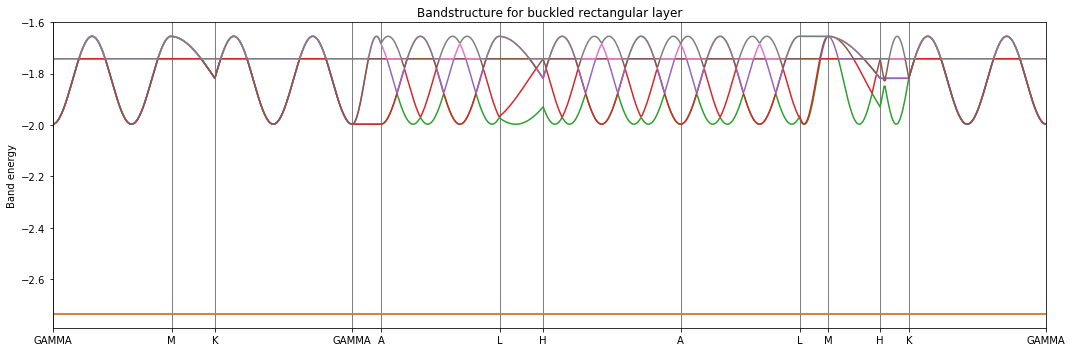

Done.



In [18]:
# ----------------------------------------
# specify k-space path
# ----------------------------------------

# specify a path in k-space by listing a set of nodes; the path
# will consist of straight line segments connecting these nodes
p = 0.5
#path=[[0.0,0.0,0.5],[0.5,0.0,0.5],[0.5,0,0.0],[0.0,0.0,0.0],[0,0,0.5],[2./3.,1./3.,0.5],[2./3.,1./3.,0.0],[0,0,0]]
# specify labels for these nodal points
#label=(r'$A $',      r'$L$',       r'$M$',       r'$\Gamma$', r'$A $', r'$H$',  r'$K$',r'$\Gamma $')

# call function k_path to construct the actual path
(k_vec,k_dist,k_node)=my_model.k_path(expath,1000)
# inputs:
#   path: see above
#   81: number of interpolated k-points to be plotted
# outputs:
#   k_vec: list of interpolated k-points
#   k_dist: horizontal axis position of each k-point in the list
#   k_node: horizontal axis position of each original node

# ----------------------------------------
# do bandstructure calculation
# ----------------------------------------
print('Calculating bandstructure...')
evals =my_model.solve_all(k_vec)

# ----------------------------------------
# plot band structure
# ----------------------------------------
print('Plotting bandstructure...')

# Initialize plot
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title("Bandstructure for buckled rectangular layer")
ax.set_ylabel("Band energy")

# specify horizontal axis details
ax.set_xlim([0,k_node[-1]])
# put tickmarks and labels at node positions
ax.set_xticks(k_node)
ax.set_xticklabels(label)
# add vertical lines at node positions
for n in range(len(k_node)):
  ax.axvline(x=k_node[n],linewidth=0.5, color='k')

# Plot two bands
ax.plot(k_dist,evals[0])
ax.plot(k_dist,evals[1])
ax.plot(k_dist,evals[2])
ax.plot(k_dist,evals[3])
ax.plot(k_dist,evals[4])
ax.plot(k_dist,evals[5])
ax.plot(k_dist,evals[6])
ax.plot(k_dist,evals[7])

# save as PDF
fig.tight_layout()
fig.savefig("direct_band.png")
#plt.ylim(-14,3)
plt.show()
print('Done.\n')

In [19]:
res = 13
k_shape = (res,res,res)


"""
k_limits = (0.5,0.5,0.5)
k_vec=np.zeros((k_shape[0]*k_shape[1]*k_shape[2], 3))
for i,x in enumerate(np.linspace(-k_limits[0],k_limits[0],k_shape[0]+1)[:-1]):
    for j,y in enumerate(np.linspace(-k_limits[1],k_limits[1],k_shape[1]+1)[:-1]):
        for k,z in enumerate(np.linspace(-k_limits[2],k_limits[2],k_shape[2]+1)[:-1]):
            k_vec[i*k_shape[1]*k_shape[2]+j*k_shape[2]+k]=np.array([x, y, z])
"""
            
k_vec=my_model.k_uniform_mesh(k_shape)



print('---------------------------------------')
print('starting calculation')
print('---------------------------------------')
print('Calculating bands...')

# solve for eigenenergies of hamiltonian on
# the set of k-points from above
evals, evec=my_model.solve_all(k_vec,eig_vectors=True)

print("Done!")
#k_vec

---------------------------------------
starting calculation
---------------------------------------
Calculating bands...
Done!


In [16]:
eC = min(evals[1])
kC = k_vec[(evals[1])==min(evals[1])][0]

eV = max(evals[0])
kV = k_vec[(evals[0])==max(evals[0])][0]

print("C_min=",eC,"at",kC)
print("V_max=",eV,"at",kV)
print("E_dir=",min(evals[1]-evals[0]),"at",k_vec[(evals[1]-evals[0])==min(evals[1]-evals[0])][0])
print("E_indir=",eC-eV,"with q=",kC-kV)

C_min= -19.046 at [ 0.  0.  0.]
V_max= -19.046 at [ 0.  0.  0.]
E_dir= 0.0 at [ 0.  0.  0.]
E_indir= 0.0 with q= [ 0.  0.  0.]


In [5]:
np.save("k-vec", k_vec)
np.save("k-shape", k_shape)
np.save("E-band-0", evals[0])
np.save("E-band-1", evals[1])
np.save("W-band-0", evec[0])
np.save("W-band-1", evec[1])

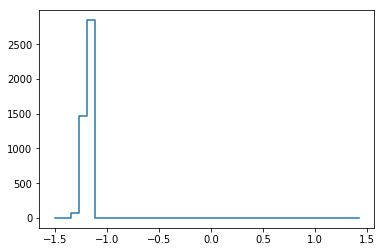

In [6]:
E = np.append(evals[0],evals[1])

binX = (np.linspace(0,0.5,25))
binY = (np.linspace(0,0.5,25))
binE = (np.linspace(-1.5,1.5,40))

hist, bins = np.histogram(E,bins=(binE))

plt.step(bins[:-1],hist)
plt.savefig("DOS%i.png"%(res))
plt.show()

In [7]:
evec

array([[[ -6.24982712e-01 +0.00000000e+00j,
           0.00000000e+00 +0.00000000e+00j,
          -1.11022302e-16 +0.00000000e+00j, ...,
           2.57513734e-18 +0.00000000e+00j,
           2.06270419e-17 +0.00000000e+00j,
           1.80120309e-01 +0.00000000e+00j],
        [ -6.24982712e-01 +0.00000000e+00j,
           0.00000000e+00 +6.53677726e-18j,
           0.00000000e+00 -5.24915664e-20j, ...,
           2.81870616e-18 -1.46451306e-18j,
           1.12561604e-18 +9.19668835e-19j,
           1.79791689e-01 -1.08753936e-02j],
        [ -6.24982712e-01 +0.00000000e+00j,
           0.00000000e+00 -2.79829702e-17j,
           0.00000000e+00 +2.24286775e-17j, ...,
           9.47999936e-19 +5.94760707e-18j,
          -4.63825194e-18 +8.07562233e-20j,
           1.78807029e-01 -2.17111041e-02j],
        ..., 
        [ -6.24982712e-01 +0.00000000e+00j,
           0.00000000e+00 -1.17142236e-17j,
           0.00000000e+00 +2.68418618e-18j, ...,
          -2.08381606e-18 +2.75771203e-

In [8]:
k_vec[:21,2]

array([ 0.        ,  0.07692308,  0.15384615,  0.23076923,  0.30769231,
        0.38461538,  0.46153846,  0.53846154,  0.61538462,  0.69230769,
        0.76923077,  0.84615385,  0.92307692,  0.        ,  0.07692308,
        0.15384615,  0.23076923,  0.30769231,  0.38461538,  0.46153846,
        0.53846154])

In [9]:
valence = evals[0]
conduct = evals[1]
kBool = k_vec[:,0] == 0.5

print(min(conduct)-max(valence[kBool]))

ValueError: max() arg is an empty sequence